## 1.引入包

In [1]:
#-*- coding=utf-8 -*-
import json
import csv
import datetime
import collections
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

## 2.单个问题下回答时间间隔分布

In [2]:
created_time = []
with open('../数据/论文用/q48109458.csv', 'r') as f:
    created_time = [json.loads(line)["created_time"] for line in f.readlines()]

In [4]:
created_time = sorted(created_time)
format_time = [datetime.datetime.fromtimestamp(time) for time in created_time]

In [5]:
second_span = []
minute_span = []
hour_span = []
day_span = []
for i in range(len(format_time)-1):
    second_span.append((format_time[i+1] - format_time[i]).seconds)
    minute_span.append((format_time[i+1] - format_time[i]).seconds/60)
    hour_span.append((format_time[i+1] - format_time[i]).seconds/3600)
    day_span.append((format_time[i+1] - format_time[i]).days)

In [7]:
feature_count_pairs = collections.Counter(minute_span).most_common()
feature_value = zip(*feature_count_pairs)[0]
count = zip(*feature_count_pairs)[1]
X = feature_value
pY = [float(n)/sum(count) for n in count]

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


('Coefficients:', array([[-1.51067034]]))
('Intercept:', array([-0.73675755]))
Residual sum of squares: 0.01745666


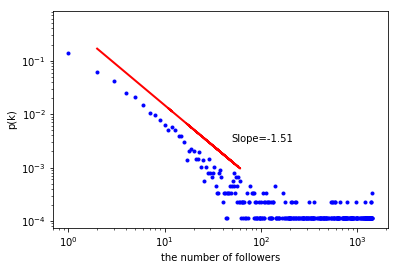

In [27]:
def drawpic(X,pY):
    _logX = []
    _logpY = []

    for x, y in zip(X,pY): #这里可以调整
        _logX.append([float(np.log10(x))])
        _logpY.append([float(np.log10(y))])
    # 模型拟合
    regr = linear_model.LinearRegression()
    regr.fit(_logX[1:45], _logpY[1:45])
    # 模型结果与得
    print('Coefficients:', regr.coef_,)
    print("Intercept:",regr.intercept_)
    # The mean square error
    print("Residual sum of squares: %.8f"
      % np.mean((regr.predict(_logX[1:45]) - _logpY[1:45]) ** 2))  # 残差平方和

    # 可视化
    #plt.title("following count loglog probability distribution")
    plt.xlabel("the number of followers")
    plt.ylabel("p(k)")
    
    plt.plot(X,pY,".",  color='blue')
    plt.plot(X[2:45], X[2:45]**regr.coef_[0][0]*np.exp(regr.intercept_[0]), "r-",linewidth=2)
    plt.xscale('log'); plt.yscale('log')
    plt.text(50, 0.003, "Slope="+ str(round(regr.coef_[0][0],2)) ,fontsize=10);

    plt.show()
drawpic(np.array(X),np.array(pY))